In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mpl_dates
from datetime import datetime

In [2]:
plt.style.use("seaborn")

In [3]:
# The entire data set 
covid_data = pd.read_csv("https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true", parse_dates=["date"])

In [4]:
bd_filter = covid_data["location"] == "Bangladesh"

In [5]:
bd_covid_data = covid_data[bd_filter]

In [6]:
bd_covid_data.drop(columns=["iso_code", "continent", "location"], inplace=True)

/home/e/.local/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
bd_covid_data.set_index("date", inplace=True)

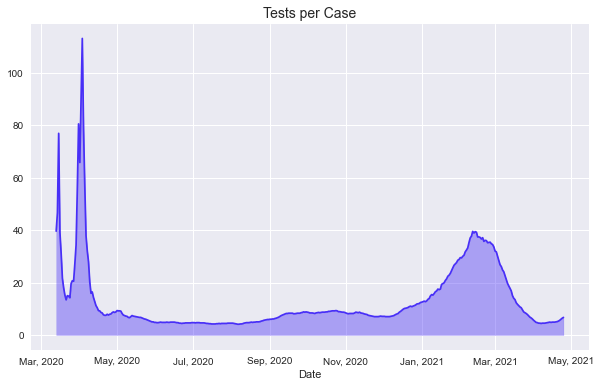

In [22]:
plt.figure(figsize=(10, 6))
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.plot(bd_covid_data.index, bd_covid_data["tests_per_case"], color='#482ff7')
plt.fill_between(bd_covid_data.index, bd_covid_data["tests_per_case"], color='#482ff7', alpha=.4)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel("Date")
plt.title("Tests per Case", size=14)
plt.show()

In [15]:
total_tests_per_hundred = bd_covid_data["total_tests_per_thousand"].dropna()/10

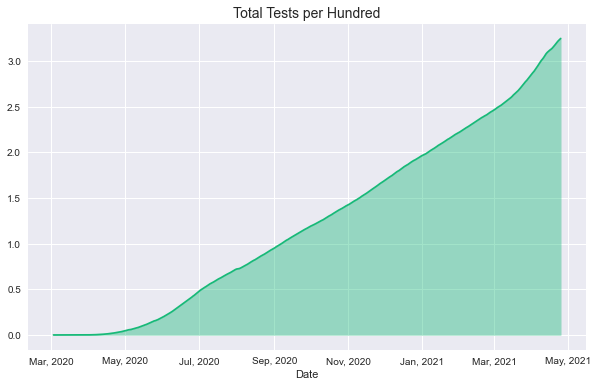

In [24]:
plt.figure(figsize=(10, 6))
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.plot(total_tests_per_hundred.index, total_tests_per_hundred, color='#17b978')
plt.fill_between(total_tests_per_hundred.index, total_tests_per_hundred, color='#17b978', alpha=.4)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel("Date")
plt.title("Total Tests per Hundred", size=14)
plt.show()

In [9]:
print(*["ax"+str(i) for i in range(1, 7)], sep=',')

ax1,ax2,ax3,ax4,ax5,ax6


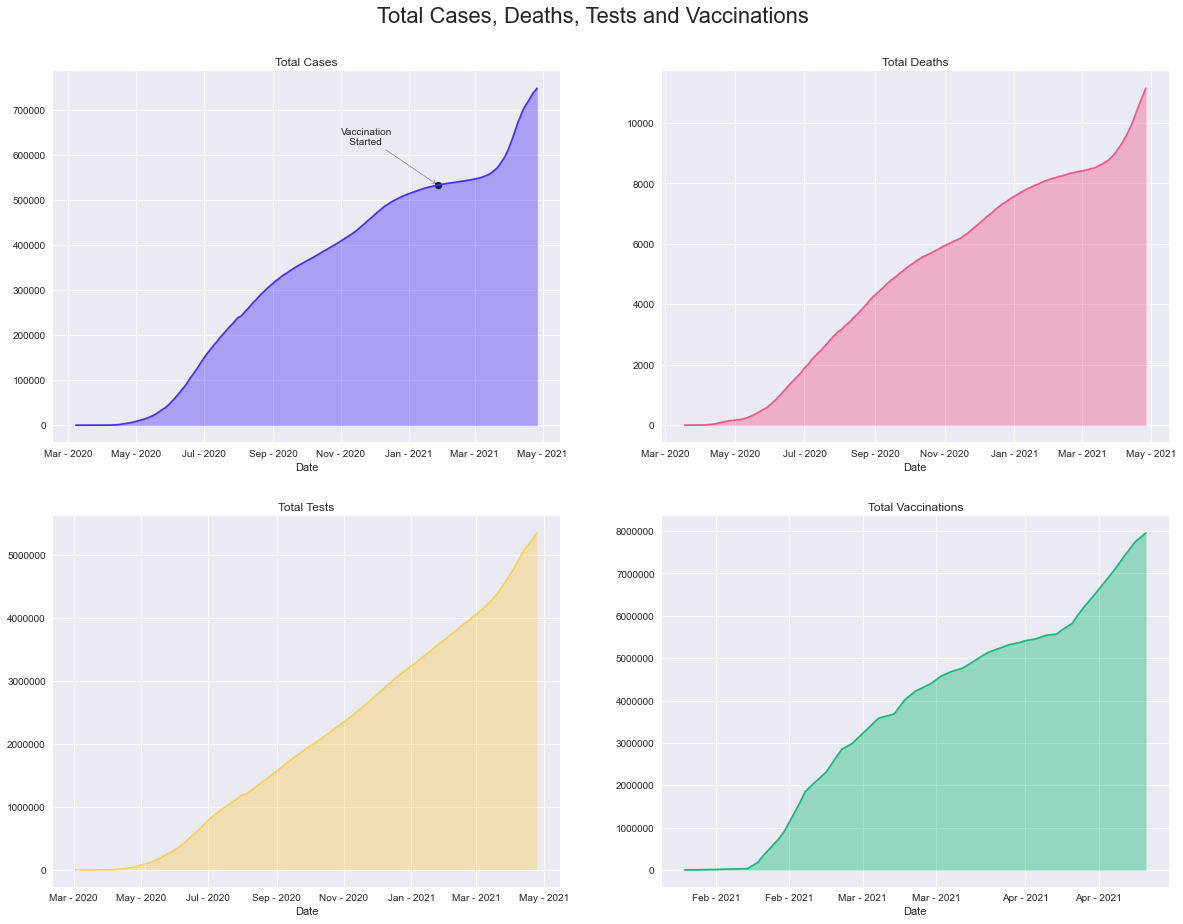

In [10]:
fig, axes = plt.subplots(2,2, figsize=(20, 15))
ax1,ax2,ax3,ax4 = axes.flatten()
date_format = mpl_dates.DateFormatter("%b - %Y")
first_vaccination_date = datetime.strptime("2021-01-27", "%Y-%m-%d")

#### axis 1
ax1.plot(bd_covid_data.index, bd_covid_data["total_cases"], color='#482ff7')
ax1.fill_between(bd_covid_data.index, bd_covid_data["total_cases"], color='#482ff7', alpha=.4)
ax1.xaxis.set_major_formatter(date_format)
ax1.scatter(first_vaccination_date,bd_covid_data["total_cases"][first_vaccination_date], color = '#071e3d', marker="o")
ax1.annotate("Vaccination\n   Started",
             xy = (first_vaccination_date,bd_covid_data["total_cases"][first_vaccination_date]),
             xytext = (datetime.strptime("2020-11-01",  "%Y-%m-%d"), bd_covid_data["total_cases"][first_vaccination_date]+90000),
             arrowprops = dict(edgecolor="k", arrowstyle='->'))
ax1.set_title("Total Cases")
ax1.set_xlabel("Date")

#### axis 2
ax2.plot(bd_covid_data.index, bd_covid_data["total_deaths"], color='#f3558e')
ax2.fill_between(bd_covid_data.index, bd_covid_data["total_deaths"], color='#f3558e', alpha=.4)
ax2.xaxis.set_major_formatter(date_format)
ax2.set_title("Total Deaths")
ax2.set_xlabel("Date")

#### axis 3
ax3.plot(bd_covid_data.index, bd_covid_data["total_tests"], color='#facf5a')
ax3.fill_between(bd_covid_data.index, bd_covid_data["total_tests"], color='#facf5a', alpha=.4)
ax3.xaxis.set_major_formatter(date_format)
ax3.ticklabel_format(axis='y', style='plain', useOffset=False)
ax3.set_title("Total Tests")
ax3.set_xlabel("Date")

#### axis 4
#ax4.plot(bd_covid_data.index, bd_covid_data["total_vaccinations"], color='#364f6b')
sns.lineplot(data=bd_covid_data["total_vaccinations"], ax=ax4, color='#17b978')
ax4.fill_between(bd_covid_data["total_vaccinations"].dropna().index, bd_covid_data["total_vaccinations"].dropna(), color='#17b978', alpha=.4)
ax4.xaxis.set_major_formatter(date_format)
ax4.set_title("Total Vaccinations")
ax4.ticklabel_format(axis='y', style='plain', useOffset=False)
ax4.set_xlabel("Date")
ax4.set_ylabel(None)


fig.suptitle("Total Cases, Deaths, Tests and Vaccinations", size=22, y=.94)
#plt.tight_layout()
plt.show()

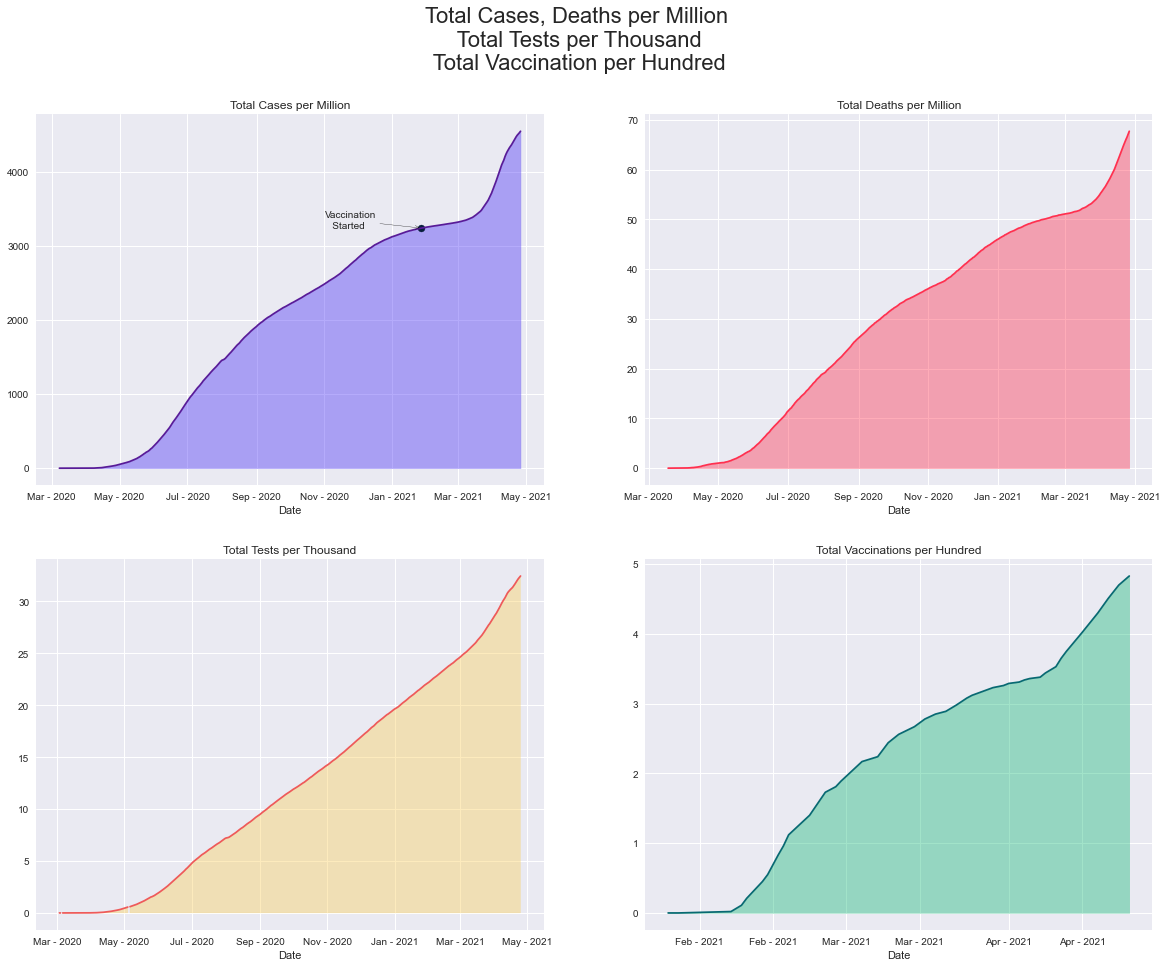

In [11]:
fig, axes = plt.subplots(2,2, figsize=(20, 15))
ax1,ax2,ax3,ax4 = axes.flatten()
date_format = mpl_dates.DateFormatter("%b - %Y")
first_vaccination_date = datetime.strptime("2021-01-27", "%Y-%m-%d")

#### axis 1
ax1.plot(bd_covid_data.index, bd_covid_data["total_cases_per_million"], color='#581b98')
ax1.fill_between(bd_covid_data.index, bd_covid_data["total_cases_per_million"], color='#482ff7', alpha=.4)
ax1.xaxis.set_major_formatter(date_format)
ax1.scatter(first_vaccination_date,bd_covid_data["total_cases_per_million"][first_vaccination_date], color = '#071e3d', marker="o")
ax1.annotate("Vaccination\n   Started",
             xy = (first_vaccination_date,bd_covid_data["total_cases_per_million"][first_vaccination_date]),
             xytext = (datetime.strptime("2020-11-01",  "%Y-%m-%d"), bd_covid_data["total_cases_per_million"][first_vaccination_date]),
             arrowprops = dict(edgecolor="k", arrowstyle='->'))
ax1.set_title("Total Cases per Million")
ax1.set_xlabel("Date")

#### axis 2
ax2.plot(bd_covid_data.index, bd_covid_data["total_deaths_per_million"], color='#ff304f')
ax2.fill_between(bd_covid_data.index, bd_covid_data["total_deaths_per_million"], color='#ff304f', alpha=.4)
ax2.xaxis.set_major_formatter(date_format)
ax2.set_title("Total Deaths per Million")
ax2.set_xlabel("Date")

#### axis 3
ax3.plot(bd_covid_data.index, bd_covid_data["total_tests_per_thousand"], color='#ee5a5a')
ax3.fill_between(bd_covid_data.index, bd_covid_data["total_tests_per_thousand"], color='#facf5a', alpha=.4)
ax3.xaxis.set_major_formatter(date_format)
ax3.ticklabel_format(axis='y', style='plain', useOffset=False)
ax3.set_title("Total Tests per Thousand")
ax3.set_xlabel("Date")

#### axis 4
#ax4.plot(bd_covid_data.index, bd_covid_data["total_vaccinations"], color='#364f6b')
sns.lineplot(data=bd_covid_data["total_vaccinations_per_hundred"], ax=ax4, color='#086972')
ax4.fill_between(bd_covid_data["total_vaccinations_per_hundred"].dropna().index, bd_covid_data["total_vaccinations_per_hundred"].dropna(), color='#17b978', alpha=.4)
ax4.xaxis.set_major_formatter(date_format)
ax4.set_title("Total Vaccinations per Hundred")
ax4.ticklabel_format(axis='y', style='plain', useOffset=False)
ax4.set_xlabel("Date")
ax4.set_ylabel(None)


fig.suptitle("Total Cases, Deaths per Million\n Total Tests per Thousand\n Total Vaccination per Hundred", size=22, y=.98)
#plt.tight_layout()
plt.show()

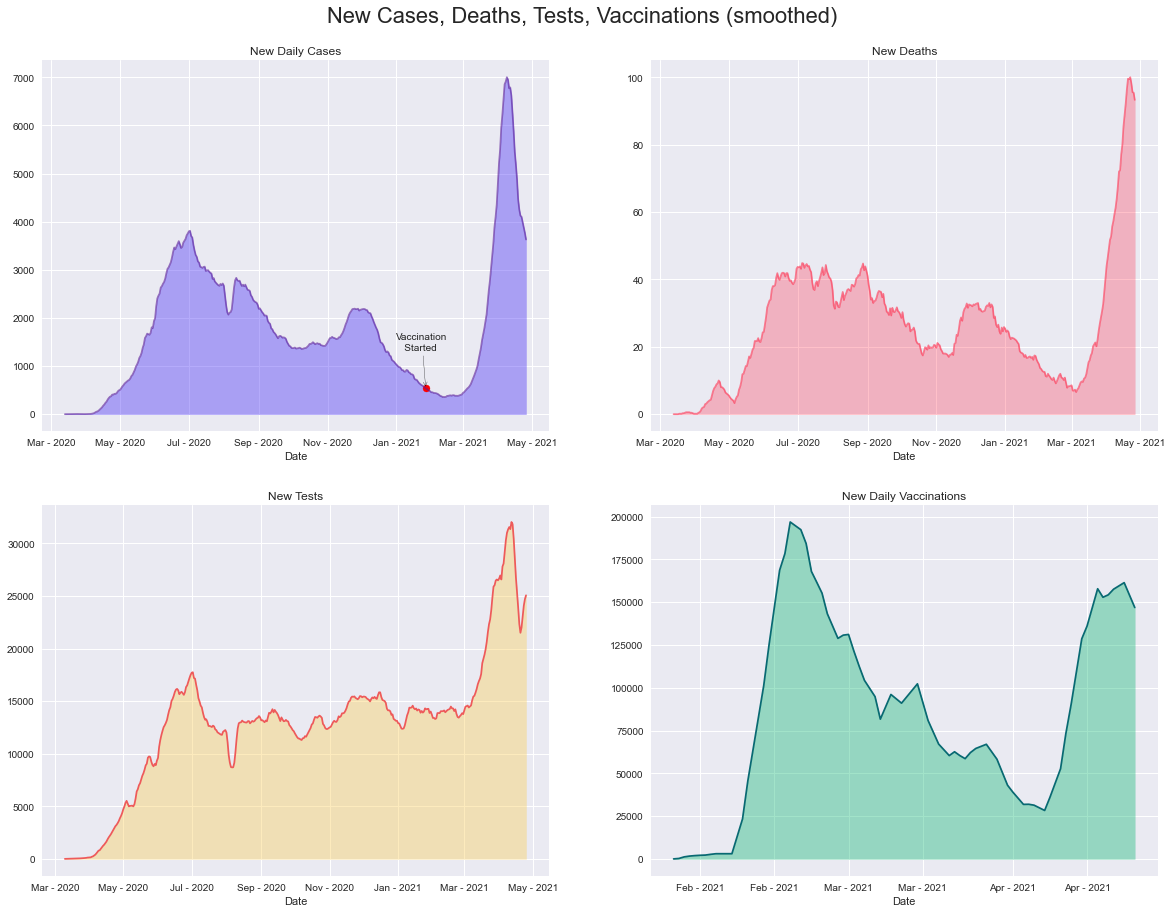

In [12]:
fig, axes = plt.subplots(2,2, figsize=(20, 15))
ax1,ax2,ax3,ax4 = axes.flatten()
date_format = mpl_dates.DateFormatter("%b - %Y")
first_vaccination_date = datetime.strptime("2021-01-27", "%Y-%m-%d")

#### axis 1
ax1.plot(bd_covid_data.index, bd_covid_data["new_cases_smoothed"], color='#581b98', alpha=.60)
ax1.fill_between(bd_covid_data.index, bd_covid_data["new_cases_smoothed"], color='#482ff7', alpha=.4)
ax1.xaxis.set_major_formatter(date_format)
ax1.scatter(first_vaccination_date,bd_covid_data["new_cases_smoothed"][first_vaccination_date], color = 'r', marker="o")
ax1.annotate("Vaccination\n   Started",
             xy = (first_vaccination_date,bd_covid_data["new_cases_smoothed"][first_vaccination_date]),
             xytext = (datetime.strptime("2021-01-01",  "%Y-%m-%d"), bd_covid_data["new_cases_smoothed"][first_vaccination_date]+800),
             arrowprops = dict(edgecolor="k", arrowstyle='->'))
ax1.set_title("New Daily Cases")
ax1.set_xlabel("Date")

#### axis 2
ax2.plot(bd_covid_data.index, bd_covid_data["new_deaths_smoothed"], color='#ff304f', alpha=.60)
ax2.fill_between(bd_covid_data.index, bd_covid_data["new_deaths_smoothed"], color='#ff304f', alpha=.3)
ax2.xaxis.set_major_formatter(date_format)
ax2.set_title("New Deaths")
ax2.set_xlabel("Date")

#### axis 3
ax3.plot(bd_covid_data.index, bd_covid_data["new_tests_smoothed"], color='#ee5a5a')
ax3.fill_between(bd_covid_data.index, bd_covid_data["new_tests_smoothed"], color='#facf5a', alpha=.4)
ax3.xaxis.set_major_formatter(date_format)
ax3.ticklabel_format(axis='y', style='plain', useOffset=False)
ax3.set_title("New Tests")
ax3.set_xlabel("Date")

#### axis 4
#ax4.plot(bd_covid_data.index, bd_covid_data["total_vaccinations"], color='#364f6b')
sns.lineplot(data=bd_covid_data["new_vaccinations_smoothed"], ax=ax4, color='#086972')
ax4.fill_between(bd_covid_data["new_vaccinations_smoothed"].dropna().index, bd_covid_data["new_vaccinations_smoothed"].dropna(), color='#17b978', alpha=.4)
ax4.xaxis.set_major_formatter(date_format)
ax4.set_title("New Daily Vaccinations")
ax4.ticklabel_format(axis='y', style='plain', useOffset=False)
ax4.set_xlabel("Date")
ax4.set_ylabel(None)


fig.suptitle("New Cases, Deaths, Tests, Vaccinations (smoothed)", size=22, y=.93)
#plt.tight_layout()
plt.show()